In [1]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
import pandas as pd

In [5]:
df_opsd = pd.read_csv('./data/opsd_germany_daily.csv', index_col=0, parse_dates=True)
df_opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
df_opsd.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [7]:
df_opsd.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [8]:
df_opsd.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [9]:
df_opsd.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=4383)

In [10]:
df_opsd.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object', name='Date', length=4383)

In [11]:
# select one row
df_opsd.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

In [12]:
# select a range
df_opsd.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-01-20,1590.687,78.647,6.371,85.018
2014-01-21,1624.806,15.643,5.835,21.478
2014-01-22,1625.155,60.259,11.992,72.251


In [13]:
# select a month
df_opsd.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-02-01,1511.866,199.607,43.502,243.109
2012-02-02,1563.407,73.469,44.675,118.144
2012-02-03,1563.631,36.352,46.510,82.862
2012-02-04,1372.614,20.551,45.225,65.776
2012-02-05,1279.432,55.522,54.572,110.094
2012-02-06,1574.766,34.896,55.389,90.285
2012-02-07,1615.078,100.312,19.867,120.179
2012-02-08,1613.774,93.763,36.930,130.693
2012-02-09,1591.532,132.219,19.042,151.261


In [14]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

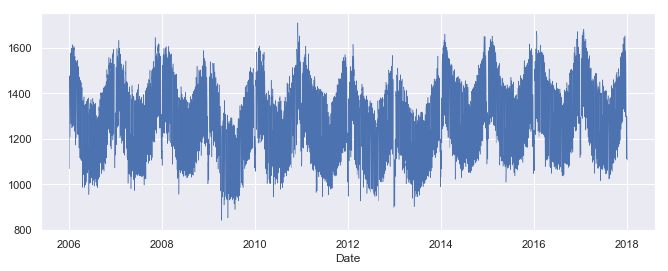

In [22]:
df_opsd['Consumption'].plot(linewidth=0.5)

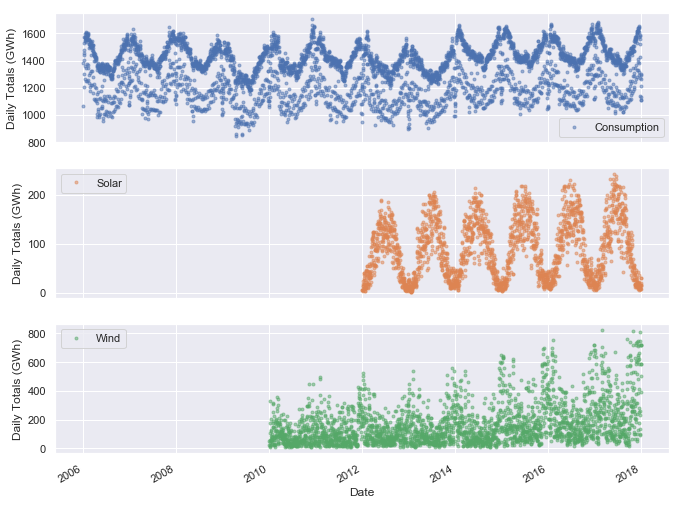

In [26]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df_opsd[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Consumtion (GWh)')

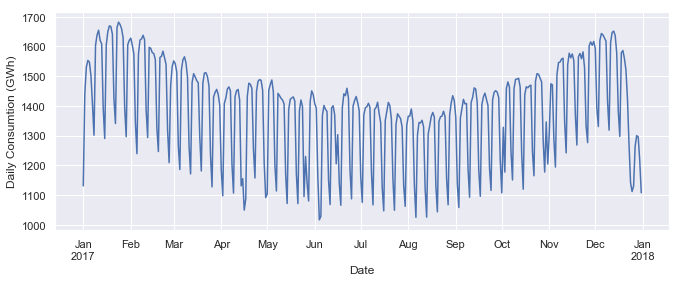

In [28]:
ax = df_opsd.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumtion (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

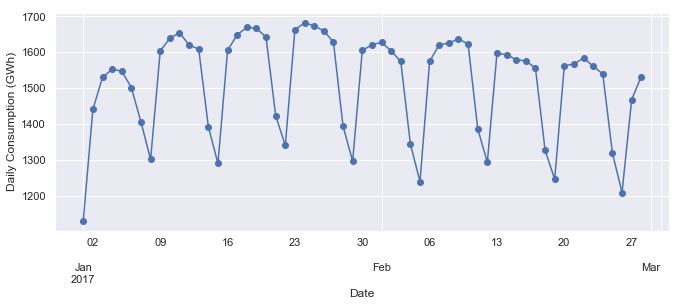

In [29]:
ax = df_opsd.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

In [31]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
df_opsd_weekly_mean = df_opsd[data_columns].resample('W').mean()
df_opsd_weekly_mean.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286
